In [1]:
from urb import *
import cv2
%matplotlib inline

Read frames from KITTI sequence 00 into a list of frames (frame).

In [2]:
%%time
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

frame = []
for frameid in range(150):
    print(frameid)
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename, RIGHTDIR)
    left_frame.get_framepoints()
    frame.append(left_frame)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
CPU times: user 1min 43s, sys: 192 ms, total: 1min 44s
Wall time: 5.63 s


We can also manually compute the Depth of the points and show these

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept.

If a new frame is added and its pose can not be reliably determined, the previous frame is turned in and they are tracked in the other frames.

In [3]:
seq = create_sequence(frame)

add frame 0
add frame 1
add frame 2
add frame 3
add frame 4
add frame 5
add frame 6
add frame 7
add frame 8
add frame 9
add frame 10
add frame 11
add frame 12
add frame 13
add frame 14
add frame 15
add frame 16
add frame 17
add frame 18
add frame 19
add frame 20
add frame 21
add frame 22
add frame 23
add frame 24
add frame 25
add frame 26
add frame 27
add frame 28
add frame 29
add frame 30
add frame 31
add frame 32
add frame 33
add frame 34
add frame 35
add frame 36
add frame 37
add frame 38
add frame 39
add frame 40
add frame 41
add frame 42
add frame 43
add frame 44
add frame 45
add frame 46
add frame 47
add frame 48
add frame 49
add frame 50
add frame 51
add frame 52
add frame 53
add frame 54
add frame 55
add frame 56
add frame 57
add frame 58
add frame 59
add frame 60
add frame 61
add frame 62
add frame 63
add frame 64
add frame 65
add frame 66
add frame 67
add frame 68
add frame 69
add frame 70
add frame 71
add frame 72
add frame 73
add frame 74
add frame 75
add frame 76
add frame

In [4]:
kf = seq.keyframes[2]
kf.get_pose()

array([[  9.99894537e-01,  -2.24523238e-03,   1.43482815e-02,
         -4.63461489e-03],
       [  2.21789896e-03,   9.99995696e-01,   1.92062440e-03,
          1.02355547e-02],
       [ -1.43525320e-02,  -1.88859881e-03,   9.99895214e-01,
         -2.36522893e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [5]:
kf.get_pose_wrt(seq.keyframes[0])

array([[  9.99494576e-01,  -1.65213557e-03,   3.17468624e-02,
         -9.00927604e-02],
       [  1.42382033e-03,   9.99972972e-01,   7.21300308e-03,
          1.13086799e-02],
       [ -3.17579212e-02,  -7.16415563e-03,   9.99469914e-01,
         -5.29998042e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [9]:
trajectoryXZ = []
points = []

for frame in seq.keyframes[:]:
    pose = frame.get_pose()
    if pose is not None:
        points_new = []
        for p in points:
            p = np.dot(pose, p)
            points_new.append(p)
        points = points_new
        new_point = np.array([0,0,0,1.0])
        points.append(new_point)
  
    
for p in points:
    print(p)
    x = p[0] + 50
    z = p[2] + 50
    trajectoryXZ.append([x, z])

[ 83.81991933  -5.06518997 -21.74875778   1.        ]
[ 80.89503055  -4.89357129 -21.56726705   1.        ]
[ 78.53497468  -4.75956468 -21.48594892   1.        ]
[ 76.0084346   -4.60901502 -21.41713136   1.        ]
[ 74.29907753  -4.50328522 -21.36963248   1.        ]
[ 71.7250423   -4.34265581 -21.36828996   1.        ]
[ 69.06754208  -4.12185875 -21.35275249   1.        ]
[ 66.28332525  -3.93826828 -21.39113436   1.        ]
[ 63.44781929  -3.76715243 -21.44385595   1.        ]
[ 61.53206342  -3.66693365 -21.45713988   1.        ]
[ 59.6113145   -3.56283671 -21.48411503   1.        ]
[ 58.64338757  -3.5232693  -21.49154752   1.        ]
[ 56.67486796  -3.40750176 -21.45981627   1.        ]
[ 54.64611006  -3.30642837 -21.4074452    1.        ]
[ 52.62692627  -3.18302589 -21.42707501   1.        ]
[ 49.6143938   -2.97387001 -21.3708117    1.        ]
[ 47.58068057  -2.83992565 -21.34003116   1.        ]
[ 45.64492362  -2.56021209 -21.27099516   1.        ]
[ 43.58725986  -2.50572478 -

In [10]:
trajectoryXZ

[[133.81991932617638, 28.251242221643931],
 [130.89503054593672, 28.43273295142081],
 [128.53497467593752, 28.514051076463339],
 [126.00843459639351, 28.582868636130758],
 [124.29907752636447, 28.630367516144407],
 [121.72504229596429, 28.631710035463254],
 [119.06754208005408, 28.647247507656132],
 [116.28332525397899, 28.608865635296095],
 [113.44781929003535, 28.556144050749936],
 [111.53206342413118, 28.542860116884842],
 [109.61131450422863, 28.515884965759785],
 [108.6433875717167, 28.508452482534288],
 [106.67486795744107, 28.54018372651705],
 [104.6461100618144, 28.59255480175765],
 [102.62692626918908, 28.572924985788514],
 [99.614393801011602, 28.629188304584126],
 [97.580680571979016, 28.659968838181694],
 [95.644923616696758, 28.729004843174366],
 [93.58725985588174, 28.725240194249107],
 [91.540719601207826, 28.717015461899983],
 [88.644833044387639, 28.632019928713632],
 [86.656601702046316, 28.636040865894575],
 [85.664952536112793, 28.622559821486565],
 [82.596242964786

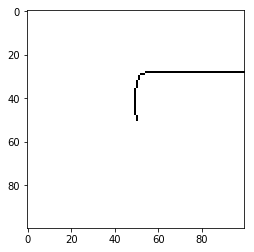

In [11]:
# Create a blank image
img = np.zeros((100, 100, 3), np.uint8) 
img[:] = 255 #or img.fill(255)

# Draw a black line with thickness of 2 px
for i in range(1,len(trajectoryXZ)):
    cv2.line(img, (int(trajectoryXZ[i - 1][0]), int(trajectoryXZ[i - 1][1])), (int(trajectoryXZ[i][0]), int(trajectoryXZ[i][1])), (0, 0, 0), 1)
plt.imshow(img)